In [1]:
import pandas as pd

# Cargar el dataset
dataset = pd.read_csv('/content/drive/MyDrive/Laboratorio No1/census.csv', encoding='latin-1')

In [2]:
# Mostramos el los primeros 5 campos del Data set
dataset.head(5)

,COUNTY,STNAME,CTYNAME,CENSUS2010POP,BIRTHS2010
0,0,Alabama,Alabama,4779736,14227
1,1,Alabama,Autauga County,54571,151
2,3,Alabama,Baldwin County,182265,516
3,5,Alabama,Barbour County,27457,70
4,7,Alabama,Bibb County,22915,44


In [3]:
print("Número de filas y columnas:", dataset.shape)

Número de filas y columnas: (3193, 5)


<ipython-input-4-f7129cc18f64>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


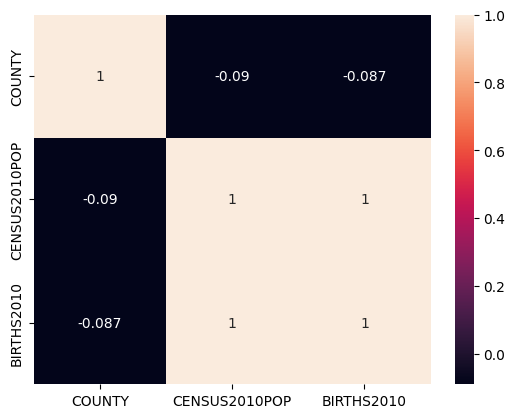

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [5]:
# Reemplaza con las columnas necesarias
dataset = dataset[['COUNTY', 'STNAME', 'CENSUS2010POP', 'BIRTHS2010']]

In [6]:
# Categorizamos los datos
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['stname_encoded'] = label_encoder.fit_transform(dataset['STNAME'])


In [7]:
# Modelo de decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = dataset[['COUNTY', 'CENSUS2010POP', 'BIRTHS2010']]
y = dataset['stname_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión (DecisionTreeClassifier):", accuracy)


Precisión (DecisionTreeClassifier): 0.11580594679186229


In [8]:
# Modelo de Vecino mas sercano
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión (KNeighborsClassifier):", accuracy)


Precisión (KNeighborsClassifier): 0.08294209702660407


In [9]:
# Obtener los datos de las columnas existentes para hacer predicciones
datos_prediccion = dataset[['COUNTY', 'CENSUS2010POP', 'BIRTHS2010']].iloc[:290]  # Obtén los primeros 10 datos de las columnas

# Realizar predicciones en los nuevos datos
nuevas_predicciones = decision_tree.predict(datos_prediccion)

# Obtener los nombres de las ciudades correspondientes a las predicciones
ciudades_predichas = label_encoder.inverse_transform(nuevas_predicciones)

# Crear DataFrame con las predicciones
predicciones_nuevos_datos = pd.DataFrame({'COUNTY': datos_prediccion['COUNTY'], 'CENSUS2010POP': datos_prediccion['CENSUS2010POP'], 'BIRTHS2010': datos_prediccion['BIRTHS2010'], 'Ciudad Predicha': ciudades_predichas})

# Mostrar las predicciones
print("Predicciones para los primeros 10 datos de las columnas existentes:")
predicciones_nuevos_datos.head(290)


Predicciones para los primeros 10 datos de las columnas existentes:


,COUNTY,CENSUS2010POP,BIRTHS2010,Ciudad Predicha
0,0,4779736,14227,South Carolina
1,1,54571,151,Alabama
2,3,182265,516,Alabama
3,5,27457,70,Alabama
4,7,22915,44,Alabama
...,...,...,...,...
285,69,299630,843,Colorado
286,71,15507,29,Colorado
287,73,5467,12,Colorado
288,75,22709,57,Colorado


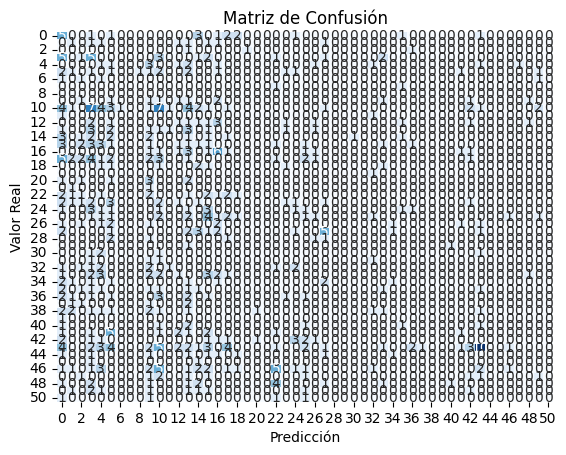

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Crear una figura y un eje
fig, ax = plt.subplots()

# Generar la representación gráfica de la matriz de confusión
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)

# Establecer etiquetas de los ejes
ax.set_xlabel('Predicción')
ax.set_ylabel('Valor Real')

# Establecer título del gráfico
ax.set_title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

